This study aims to investigate various strategies for enhancing the performance of a neural network model using the IMDb dataset.

 We will with modifications to an existing model, analyzing the Outcomes of different approaches including We will experiment with changes to an existing model, analyzing the Outcomes of different approaches including:

 **Architectural Changes**

* Changing the number of hidden layers
* They also include varying the quantity number of units in each layer

**Functional Modifications**

* Altering the loss function
* Switching activation functions

**Regularization Techniques**

* Implementing dropout strategies

 The IMDb dataset used in this study contains 50,000 movie critiques; half of which contains positive sentiments while the other half contains negative sentiments. Half of the reviews are used for training which takes 25,000 while the other 25,000 is used for testing the trained models.

 It is for this reason that, if these changes are applied systematically with assessment of the effects made, insights into the best performing neural network model for sentiment analysis shall be achieved. This approach enables us to know which change Outcomes in the most monumental boost in the model’s chances of classifying movie reviews as either positive or negative.

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(tr_review, tr_sentiment), (te_review, te_sentiment) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
tr_review

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
tr_sentiment[0]

1

In [ ]:
len(tr_sentiment)

25000

In [ ]:
te_review

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [ ]:
te_sentiment[0]

0

In [ ]:
max([max(sequence) for sequence in te_review])

9999

#Transforming Reviews into text#

In [ ]:
word_to_id = imdb.get_word_index()
index_to_word = dict(
    [(value, key) for (key, value) in word_to_id.items()])
translated_review = " ".join(
    [index_to_word.get(i - 3, "?") for i in tr_review[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
translated_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#DATA PREPARATION#

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    Outcomes = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            Outcomes[i, j] = 1.
    return Outcomes

#DATA VECTORIZATION#

In [ ]:
train_review_vectors = vectorize_sequences(tr_review)
test_review_vectors = vectorize_sequences(te_review)

In [ ]:
train_review_vectors[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
test_review_vectors[0]

array([0., 1., 1., ..., 0., 0., 0.])

#LABEL VECTORIZATION#

In [ ]:
train_sentiment_vectors  = np.asarray(tr_sentiment).astype("float32")
testing_sentiment_vectors= np.asarray(te_sentiment).astype("float32")

#Building model using relu and compiling it#

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
seed(456)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
seed(456)
x_validation = train_review_vectors[:10000]
partial_train_review_vectors= train_review_vectors[10000:]
y_validation = train_sentiment_vectors[:10000]
partial_train_sentiment_vectors = train_sentiment_vectors[10000:]

In [ ]:
seed(456)
history = model.fit(partial_train_review_vectors,
                    partial_train_sentiment_vectors,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7044 - loss: 0.6044 - val_accuracy: 0.8623 - val_loss: 0.4064
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8884 - loss: 0.3477 - val_accuracy: 0.8846 - val_loss: 0.3138
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9181 - loss: 0.2494 - val_accuracy: 0.8847 - val_loss: 0.2894
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9363 - loss: 0.1987 - val_accuracy: 0.8874 - val_loss: 0.2797
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9471 - loss: 0.1698 - val_accuracy: 0.8852 - val_loss: 0.2808
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9558 - loss: 0.1405 - val_accuracy: 0.8853 - val_loss: 0.2855
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9648 - loss: 0.1177 - val_accuracy: 0.8847 - val_loss: 0.3002
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9705 - loss: 0.1059 - val_accuracy: 0.8837 - v

The initial training phase showed a loss of 0.6044 with an accuracy of 70.44%, while the validation set achieved 86.23% accuracy with a loss of 0.4064. As training progressed, the model’s training accuracy steadily improved, reaching 99.95% with a minimal loss of 0.0112 by epoch 20. However, validation accuracy remained relatively stable around 86.85%, while validation loss increased to 0.5720, indicating clear signs of overfitting. This suggests that while the model learns well on the training data, its ability to generalize to unseen data is limited. Implementing regularization techniques such as dropout or early stopping could help mitigate this issue and improve generalization.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

##Plotting the training and validation loss#

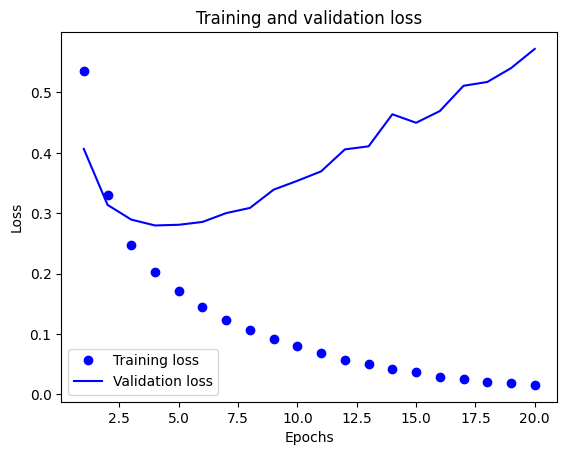

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

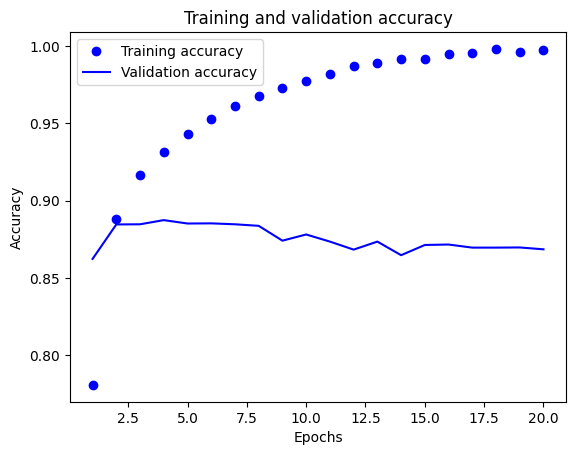

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graphs show that after several epochs, the model overfits, leading to rising validation loss and fluctuating accuracy. While training loss decreases steadily, validation performance stagnates. To improve generalization, techniques like regularization, early stopping, or hyperparameter tuning should be applied.

##Retraining the model##

In [ ]:
np.random.seed(456)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_review_vectors, train_sentiment_vectors, epochs=4, batch_size=512)
Outcomes = model.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7382 - loss: 0.5713
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9004 - loss: 0.3031
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9218 - loss: 0.2256
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9353 - loss: 0.1862
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8717 - loss: 0.3139


In [ ]:
Outcomes

[0.3154633641242981, 0.8715199828147888]

The model achieved a loss of 0.3154 and an accuracy of 87.15%, indicating strong predictive performance.

In [ ]:
model.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13467711],
       [0.99864274],
       [0.4732377 ],
       ...,
       [0.0718158 ],
       [0.04775799],
       [0.36563015]], dtype=float32)

#Building a neural network with 1 hidden layer#

In [ ]:
seed(456)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]


history_1 = model1.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7044 - loss: 0.5882 - val_accuracy: 0.8713 - val_loss: 0.3937
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8936 - loss: 0.3437 - val_accuracy: 0.8720 - val_loss: 0.3350
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9120 - loss: 0.2716 - val_accuracy: 0.8763 - val_loss: 0.3137
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9301 - loss: 0.2218 - val_accuracy: 0.8827 - val_loss: 0.2911
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9378 - loss: 0.1983 - val_accuracy: 0.8898 - val_loss: 0.2746
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9505 - loss: 0.1700 - val_accuracy: 0.8877 - val_loss: 0.2740
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9540 - loss: 0.1510 - val_accuracy: 0.8878 - val_loss: 0.2760
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9586 - loss: 0.1408 - val_accuracy: 0.8847 - v

In [ ]:
history_dict = history_1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

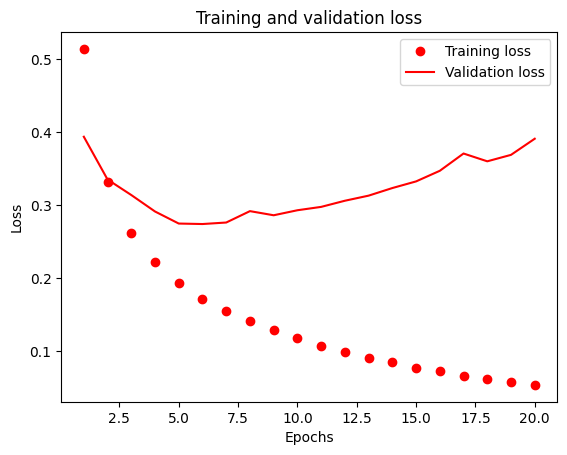

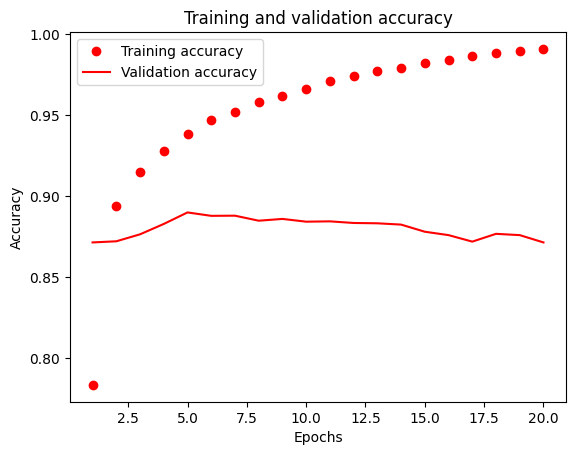

In [ ]:
import matplotlib.pyplot as plt
history_dict = history_1.history
loss_values = history_dict["loss"]
validation_loss = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, validation_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(456)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_review_vectors, train_sentiment_vectors, epochs=5, batch_size=512)
Outcomes1 = model1.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7368 - loss: 0.5466
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9026 - loss: 0.2982
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9197 - loss: 0.2376
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9296 - loss: 0.2024
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9377 - loss: 0.1845
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8843 - loss: 0.2821


In [ ]:
Outcomes1

[0.27987316250801086, 0.8870400190353394]

The test set has a loss of 0.2798 and an accuracy of 88.70%.

In [ ]:
model1.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.2441623 ],
       [0.9997981 ],
       [0.8317453 ],
       ...,
       [0.1503478 ],
       [0.10652863],
       [0.64265513]], dtype=float32)

#Creating a neural network with three hidden layers#

In [ ]:
np.random.seed(456)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

history3 = model_3.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6377 - loss: 0.6389 - val_accuracy: 0.8583 - val_loss: 0.4653
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8841 - loss: 0.4051 - val_accuracy: 0.8849 - val_loss: 0.3382
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9158 - loss: 0.2790 - val_accuracy: 0.8911 - val_loss: 0.2912
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9341 - loss: 0.2108 - val_accuracy: 0.8736 - val_loss: 0.3142
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9465 - loss: 0.1686 - val_accuracy: 0.8840 - val_loss: 0.2916
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9565 - loss: 0.1406 - val_accuracy: 0.8781 - val_loss: 0.3072
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9675 - loss: 0.1119 - val_accuracy: 0.8796 - val_loss: 0.3093
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9754 - loss: 0.0900 - val_accuracy: 0.8823 - v

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

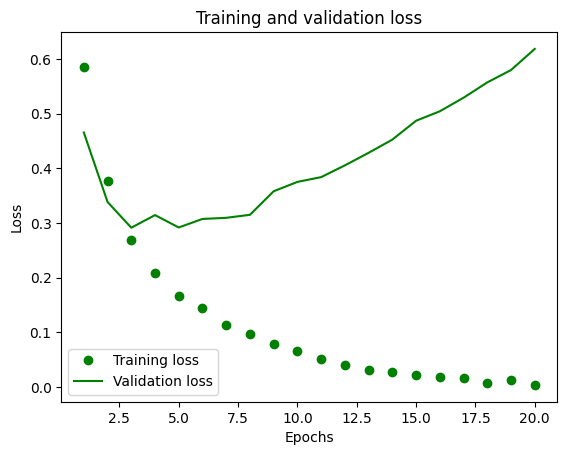

In [ ]:
loss_values = history_dict3["loss"]
validation_loss = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, validation_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

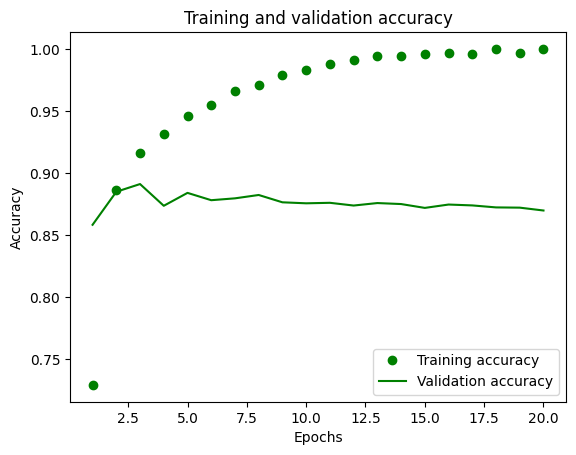

In [ ]:
plt.clf()
accuracy = history_dict3["accuracy"]
validation_accuracy = history_dict3["val_accuracy"]
plt.plot(epochs, accuracy, "go", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(456)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(train_review_vectors, train_sentiment_vectors, epochs=3, batch_size=512)
Outcomes_3 = model_3.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7199 - loss: 0.5567
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9044 - loss: 0.2762
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9303 - loss: 0.1981
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8789 - loss: 0.3012


The test set has a loss of 0.3013 and an accuracy of 87.89%

In [ ]:
Outcomes_3

[0.30394694209098816, 0.8791199922561646]

In [ ]:
model_3.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.17154704],
       [0.9983313 ],
       [0.72589093],
       ...,
       [0.08330796],
       [0.04060772],
       [0.26142892]], dtype=float32)

The model achieved a test loss of 0.3039 and an accuracy of 87.91%, indicating strong performance in sentiment classification. However, further optimization, such as fine-tuning hyperparameters or applying regularization, may enhance generalization.





#Building Neural Network with 32 units#

In [ ]:
np.random.seed(456)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(456)
history32 = model_32.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6898 - loss: 0.5801 - val_accuracy: 0.8315 - val_loss: 0.3924
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8941 - loss: 0.3023 - val_accuracy: 0.8878 - val_loss: 0.2868
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9256 - loss: 0.2117 - val_accuracy: 0.8837 - val_loss: 0.2899
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9490 - loss: 0.1612 - val_accuracy: 0.8840 - val_loss: 0.2872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9538 - loss: 0.1407 - val_accuracy: 0.8834 - val_loss: 0.2950
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9707 - loss: 0.1020 - val_accuracy: 0.8706 - val_loss: 0.3420
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9770 - loss: 0.0855 - val_accuracy: 0.8839 - val_loss: 0.3228
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9790 - loss: 0.0730 - val_accuracy: 0.8600 - v

In [ ]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

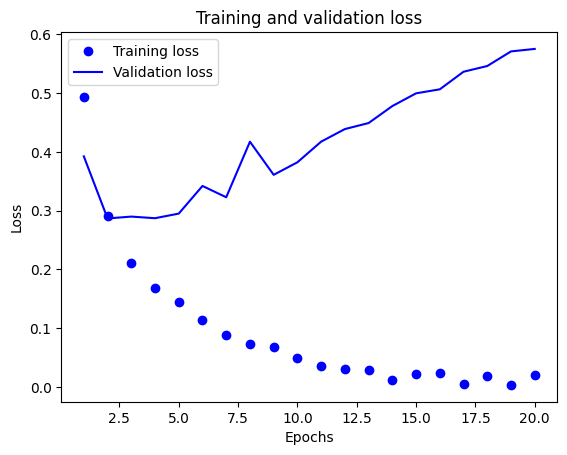

In [ ]:
loss_values = history_dict32["loss"]
validation_loss = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

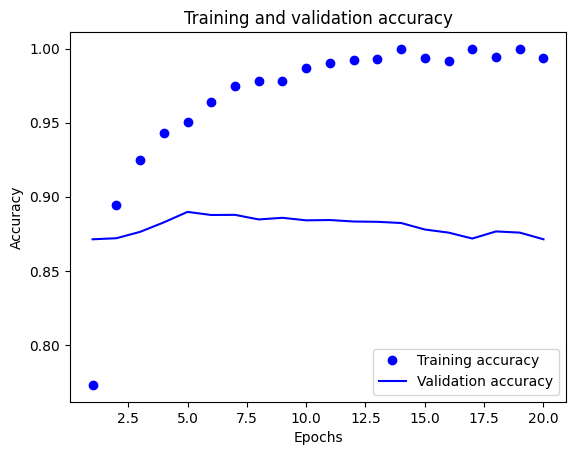

In [ ]:
plt.clf()
accuracy = history_dict32["accuracy"]
validation_accuracy = history_dict32["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_32 = model_32.fit(train_review_vectors, train_sentiment_vectors, epochs=3, batch_size=512)
Outcomes_32 = model_32.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9496 - loss: 0.2034
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9685 - loss: 0.1049
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9795 - loss: 0.0694
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8652 - loss: 0.4316


[0.42727112770080566, 0.8682799935340881]

In [ ]:
model_32.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02263858],
       [0.9999994 ],
       [0.05956541],
       ...,
       [0.05700878],
       [0.00932883],
       [0.86692435]], dtype=float32)

The model achieved a final training accuracy of 97.95% with a loss of 0.0694 by the third epoch. On the test set, it recorded an accuracy of 86.52% and a loss of 0.4316, indicating good performance but some degree of overfitting. Further improvements could be made by applying regularization techniques or fine-tuning hyperparameters to enhance generalization.

#Traing the model with 64 units#

In [ ]:
np.random.seed(456)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(456)
history64 = model_64.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6707 - loss: 0.5850 - val_accuracy: 0.8736 - val_loss: 0.3433
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8993 - loss: 0.2896 - val_accuracy: 0.8762 - val_loss: 0.3039
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9266 - loss: 0.2126 - val_accuracy: 0.8628 - val_loss: 0.3369
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9336 - loss: 0.1825 - val_accuracy: 0.8858 - val_loss: 0.2851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9547 - loss: 0.1352 - val_accuracy: 0.8562 - val_loss: 0.3949
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9589 - loss: 0.1159 - val_accuracy: 0.8740 - val_loss: 0.3319
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9728 - loss: 0.0891 - val_accuracy: 0.8629 - val_loss: 0.4115
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9820 - loss: 0.0671 - val_accuracy: 0.8778 - 

In [ ]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

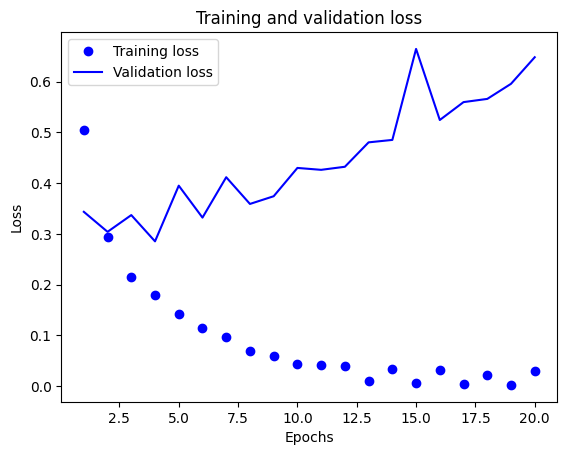

In [ ]:
loss_values = history_dict64["loss"]
validation_loss = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

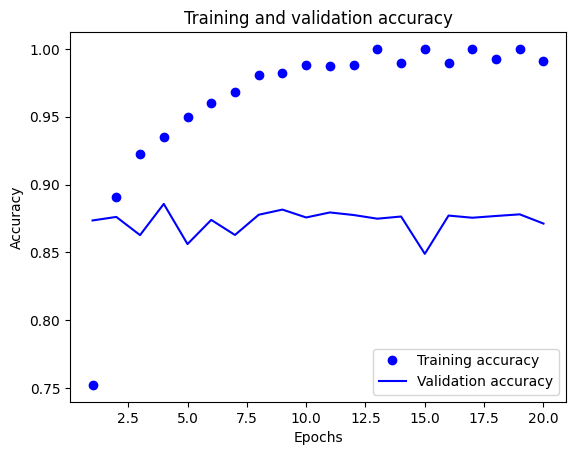

In [ ]:
plt.clf()
accuracy = history_dict64["accuracy"]
validation_accuracy = history_dict64["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_64 = model_64.fit(train_review_vectors,
train_sentiment_vectors
, epochs=3, batch_size=512)
Outcomes_64 = model_64.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9499 - loss: 0.2028
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9716 - loss: 0.0934
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9844 - loss: 0.0532
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8673 - loss: 0.4189


[0.41572946310043335, 0.8702800273895264]

In [ ]:
model_64.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01790529],
       [0.9999999 ],
       [0.84343964],
       ...,
       [0.03159026],
       [0.01513853],
       [0.98205656]], dtype=float32)

The validation set has an accuracy of 87.07%.

#Training the model with 128 units#

In [ ]:
np.random.seed(456)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(456)
history_128 = model_128.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.6627 - loss: 0.6053 - val_accuracy: 0.8754 - val_loss: 0.3445
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8838 - loss: 0.3099 - val_accuracy: 0.8774 - val_loss: 0.3009
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9130 - loss: 0.2305 - val_accuracy: 0.8781 - val_loss: 0.3020
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9354 - loss: 0.1781 - val_accuracy: 0.8804 - val_loss: 0.3118
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9470 - loss: 0.1419 - val_accuracy: 0.8335 - val_loss: 0.4328
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9599 - loss: 0.1163 - val_accuracy: 0.8735 - val_loss: 0.3344
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9743 - loss: 0.0771 - val_accuracy: 0.8679 - val_loss: 0.3674
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9767 - loss: 0.0726 - val_accuracy: 0.85

In [ ]:
history_dict128 = history_128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

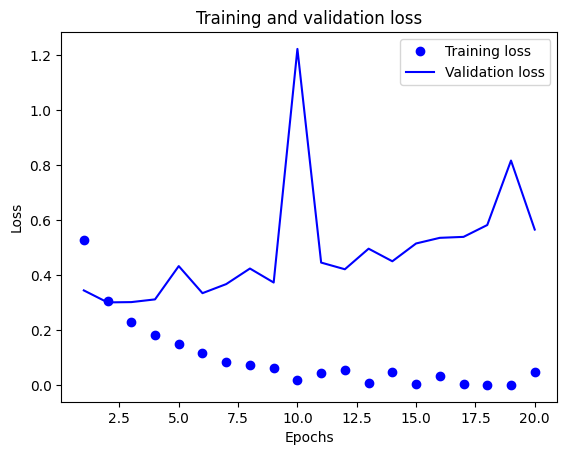

In [ ]:
loss_values = history_dict128["loss"]
validation_loss = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

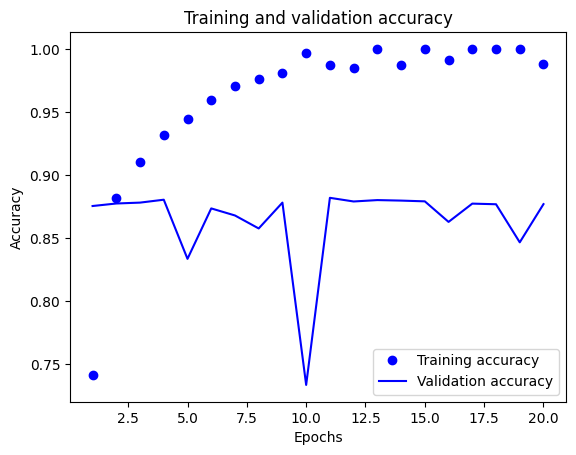

In [ ]:
plt.clf()
accuracy = history_dict128["accuracy"]
validation_accuracy = history_dict128["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_128 = model_128.fit(train_review_vectors, train_sentiment_vectors, epochs=2, batch_size=512)
Outcomes_128 = model_128.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9507 - loss: 0.1708
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9776 - loss: 0.0764
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8663 - loss: 0.3823


[0.37620270252227783, 0.8710399866104126]

In [ ]:
model_128.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.03703856],
       [0.9999998 ],
       [0.95030415],
       ...,
       [0.09599417],
       [0.00634685],
       [0.9371129 ]], dtype=float32)

The validation set has an accuracy of 87.10%

#MSE Loss Function#

In [ ]:
np.random.seed(456)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]
# Model Fit
np.random.seed(456)
history_model_MSE = model_MSE.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6887 - loss: 0.2062 - val_accuracy: 0.8645 - val_loss: 0.1222
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8952 - loss: 0.1019 - val_accuracy: 0.8806 - val_loss: 0.0963
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9191 - loss: 0.0739 - val_accuracy: 0.8850 - val_loss: 0.0878
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9403 - loss: 0.0580 - val_accuracy: 0.8876 - val_loss: 0.0860
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9457 - loss: 0.0507 - val_accuracy: 0.8832 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9556 - loss: 0.0431 - val_accuracy: 0.8789 - val_loss: 0.0899
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9622 - loss: 0.0378 - val_accuracy: 0.8816 - val_loss: 0.0845
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9653 - loss: 0.0344 - val_accuracy: 0.8813 - v

In [ ]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

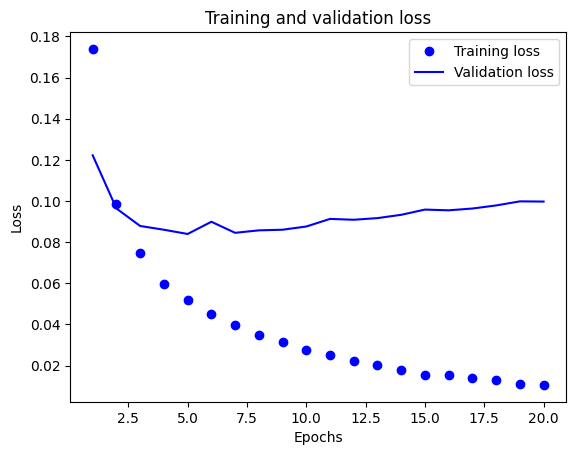

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
validation_loss = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

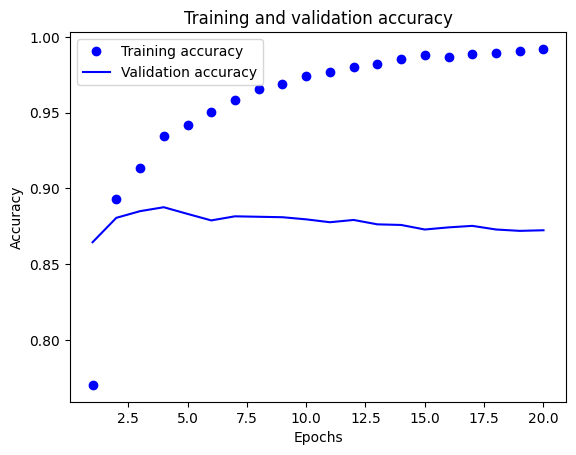

In [ ]:
plt.clf()
accuracy = history_dict_MSE["accuracy"]
validation_accuracy = history_dict_MSE["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_MSE = model_MSE.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9454 - loss: 0.0459
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9589 - loss: 0.0360
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9665 - loss: 0.0313
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9722 - loss: 0.0271
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9735 - loss: 0.0260
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9775 - loss: 0.0232
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9804 - loss: 0.0203
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9814 - loss: 0.0195
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8609 - loss: 0.1128


[0.11114399135112762, 0.8637199997901917]

In [ ]:
model_MSE.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0220186 ],
       [0.9999999 ],
       [0.9386586 ],
       ...,
       [0.06176595],
       [0.01011837],
       [0.85054547]], dtype=float32)

#Tanh Activation Function#

In [ ]:
np.random.seed(456)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(456)

history_tanh = model_tanh.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7052 - loss: 0.5847 - val_accuracy: 0.8707 - val_loss: 0.3820
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8998 - loss: 0.3253 - val_accuracy: 0.8730 - val_loss: 0.3143
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9256 - loss: 0.2291 - val_accuracy: 0.8881 - val_loss: 0.2765
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9445 - loss: 0.1742 - val_accuracy: 0.8769 - val_loss: 0.2978
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9558 - loss: 0.1389 - val_accuracy: 0.8808 - val_loss: 0.2957
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9642 - loss: 0.1158 - val_accuracy: 0.8831 - val_loss: 0.3080
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9727 - loss: 0.0893 - val_accuracy: 0.8779 - val_loss: 0.3435
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.8714 - v

In [ ]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

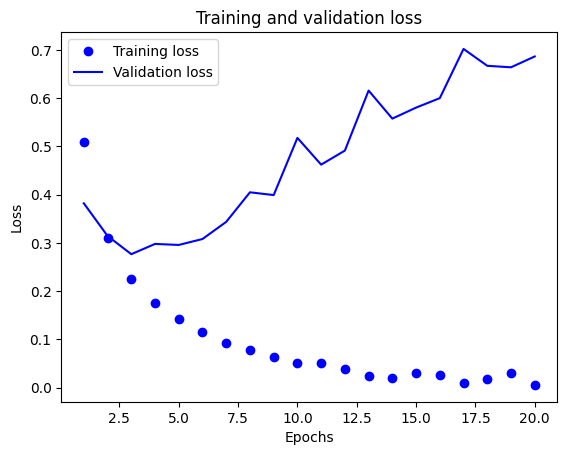

In [ ]:
loss_values = history_dict_tanh["loss"]
validation_loss = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

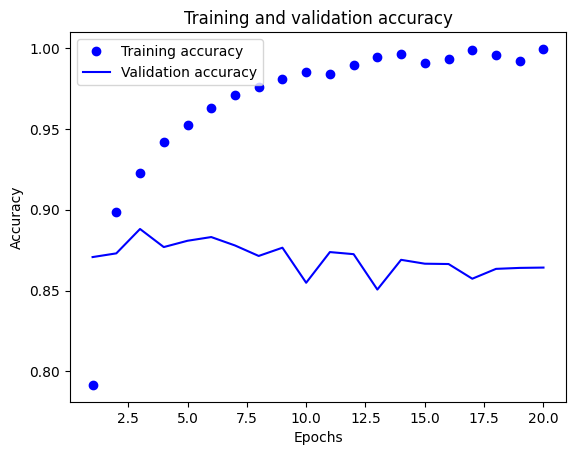

In [ ]:
plt.clf()
accuracy = history_dict_tanh["accuracy"]
validation_accuracy = history_dict_tanh["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(train_review_vectors,
train_sentiment_vectors
, epochs=8, batch_size=512)
Outcomes_tanh = model_tanh.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9371 - loss: 0.3025
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9600 - loss: 0.1577
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9677 - loss: 0.1112
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9759 - loss: 0.0859
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9791 - loss: 0.0732
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9805 - loss: 0.0683
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9805 - loss: 0.0646
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9854 - loss: 0.0553
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.5771


[0.572213888168335, 0.8550800085067749]

##Adam Optimizer Function

In [ ]:
np.random.seed(456)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(456)

history_adam = model_adam.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6457 - loss: 0.6434 - val_accuracy: 0.8486 - val_loss: 0.4229
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8857 - loss: 0.3487 - val_accuracy: 0.8865 - val_loss: 0.3034
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9278 - loss: 0.2221 - val_accuracy: 0.8895 - val_loss: 0.2794
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9524 - loss: 0.1605 - val_accuracy: 0.8867 - val_loss: 0.2787
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9663 - loss: 0.1282 - val_accuracy: 0.8841 - val_loss: 0.2938
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9754 - loss: 0.0994 - val_accuracy: 0.8825 - val_loss: 0.3069
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9834 - loss: 0.0768 - val_accuracy: 0.8789 - val_loss: 0.3305
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9895 - loss: 0.0597 - val_accuracy: 0.8806 - v

In [ ]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

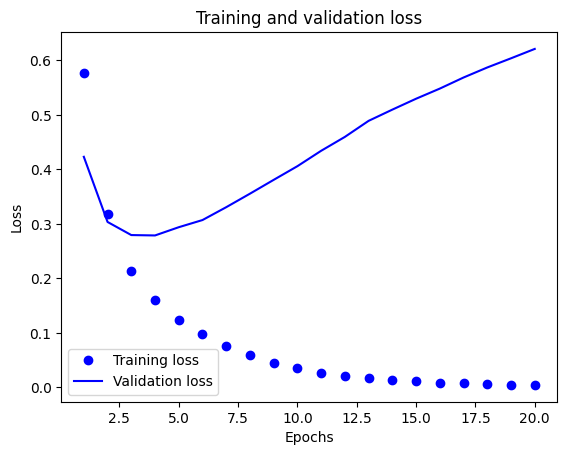

In [ ]:
loss_values = history_dict_adam["loss"]
validation_loss = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

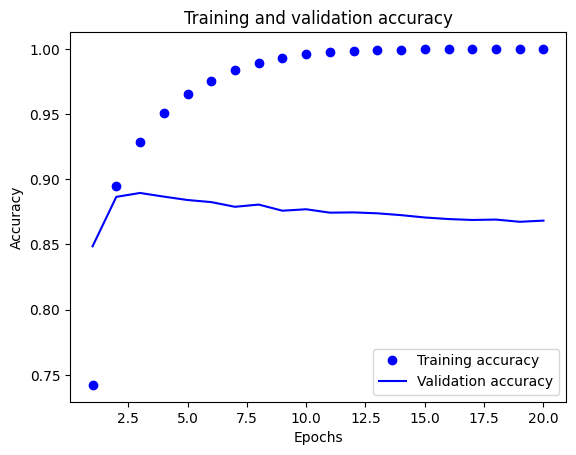

In [ ]:
plt.clf()
accuracy = history_dict_adam["accuracy"]
validation_accuracy = history_dict_adam["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_adam.fit(train_review_vectors, train_sentiment_vectors, epochs=4, batch_size=512)
Outcomes_adam = model_adam.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9439 - loss: 0.2347
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9676 - loss: 0.1044
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9820 - loss: 0.0661
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9904 - loss: 0.0458
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8584 - loss: 0.5413


[0.5319036841392517, 0.8593999743461609]

#Regularization#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(456)
history_model_regularization = model_regularization.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6920 - loss: 0.6546 - val_accuracy: 0.8598 - val_loss: 0.4734
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8840 - loss: 0.4145 - val_accuracy: 0.8763 - val_loss: 0.3825
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9150 - loss: 0.3212 - val_accuracy: 0.8887 - val_loss: 0.3423
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9320 - loss: 0.2732 - val_accuracy: 0.8888 - val_loss: 0.3316
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9398 - loss: 0.2423 - val_accuracy: 0.8877 - val_loss: 0.3320
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9474 - loss: 0.2230 - val_accuracy: 0.8868 - val_loss: 0.3328
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9521 - loss: 0.2080 - val_accuracy: 0.8762 - val_loss: 0.3618
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9607 - loss: 0.1927 - val_accuracy: 0.8838 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

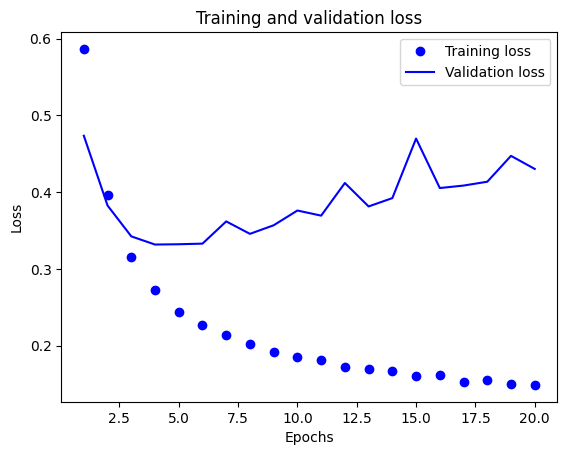

In [ ]:
loss_values = history_dict_regularization["loss"]
validation_loss = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

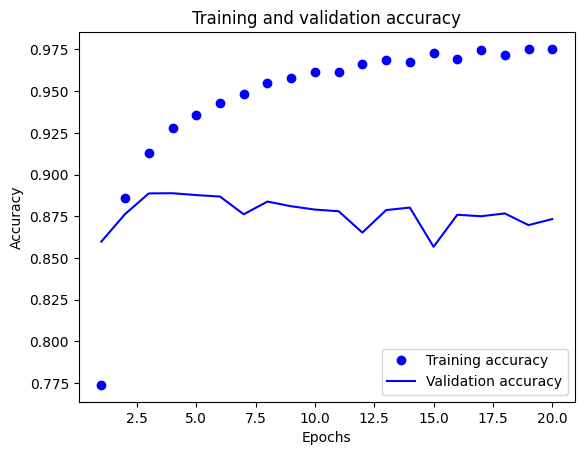

In [ ]:
plt.clf()
accuracy = history_dict_regularization["accuracy"]
validation_accuracy = history_dict_regularization["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularization.fit(train_review_vectors,
train_sentiment_vectors
, epochs=8, batch_size=512)
Outcomes_regularization = model_regularization.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9352 - loss: 0.2613
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9482 - loss: 0.2137
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9517 - loss: 0.1999
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9590 - loss: 0.1863
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9574 - loss: 0.1860
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9579 - loss: 0.1852
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9648 - loss: 0.1729
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9612 - loss: 0.1715
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8668 - loss: 0.4226


[0.41944053769111633, 0.8700000047683716]

The loss on test set is 0.4194 and accuracy is 87.00%

#DROPOUT#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(456)
history_model_Dropout = model_Dropout.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5532 - loss: 0.6798 - val_accuracy: 0.8369 - val_loss: 0.5881
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7105 - loss: 0.5828 - val_accuracy: 0.8581 - val_loss: 0.4821
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7803 - loss: 0.4904 - val_accuracy: 0.8756 - val_loss: 0.3936
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8379 - loss: 0.4187 - val_accuracy: 0.8743 - val_loss: 0.3442
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8695 - loss: 0.3587 - val_accuracy: 0.8848 - val_loss: 0.3056
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8902 - loss: 0.3201 - val_accuracy: 0.8872 - val_loss: 0.2871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9106 - loss: 0.2815 - val_accuracy: 0.8882 - val_loss: 0.2746
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9217 - loss: 0.2434 - val_accuracy: 0.8860 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

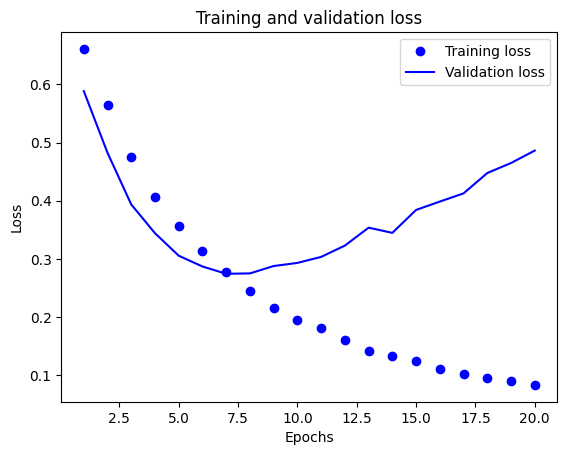

In [ ]:
loss_values = history_dict_Dropout["loss"]
validation_loss = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

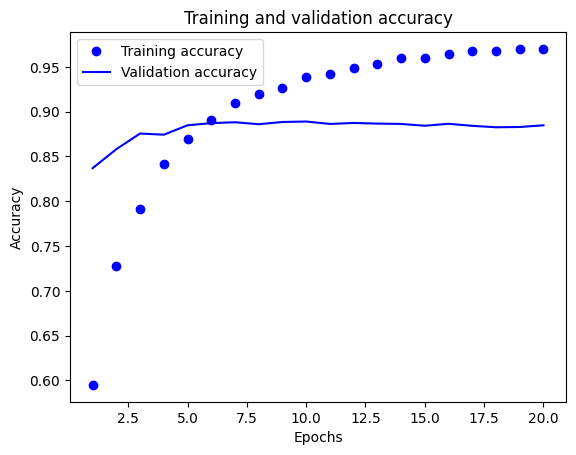

In [ ]:
plt.clf()
accuracy = history_dict_Dropout["accuracy"]
validation_accuracy = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_Dropout = model_Dropout.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9267 - loss: 0.2524
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9390 - loss: 0.1928
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9421 - loss: 0.1768
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9444 - loss: 0.1604
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9518 - loss: 0.1405
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9539 - loss: 0.1300
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9562 - loss: 0.1279
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9576 - loss: 0.1298
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8708 - loss: 0.4664


[0.45542824268341064, 0.8736400008201599]

The loss on the test set is 0.455 and accuracy is 0.8736

#Training model with hyper tuned parameters#

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(456)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(456)
history_model_Hyper = model_Hyper.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5591 - loss: 0.2561 - val_accuracy: 0.7948 - val_loss: 0.2202
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7553 - loss: 0.2138 - val_accuracy: 0.8139 - val_loss: 0.1768
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8407 - loss: 0.1795 - val_accuracy: 0.8583 - val_loss: 0.1518
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8767 - loss: 0.1490 - val_accuracy: 0.8790 - val_loss: 0.1315
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9023 - loss: 0.1230 - val_accuracy: 0.8839 - val_loss: 0.1160
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9154 - loss: 0.1033 - val_accuracy: 0.8711 - val_loss: 0.1198
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9279 - loss: 0.0865 - val_accuracy: 0.8825 - val_loss: 0.1060
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9366 - loss: 0.0749 - val_accuracy: 0.8820 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

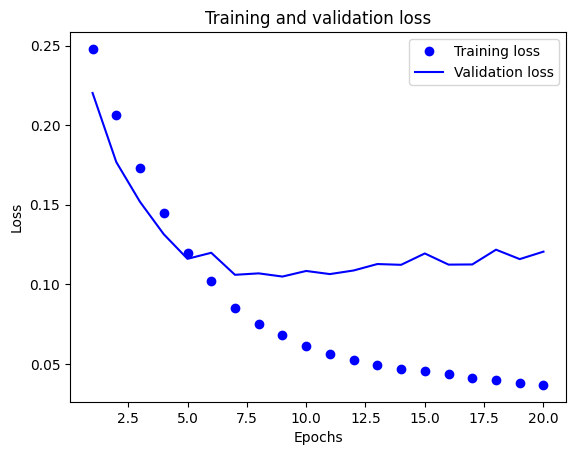

In [ ]:
loss_values = history_dict_Hyper["loss"]
validation_loss = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

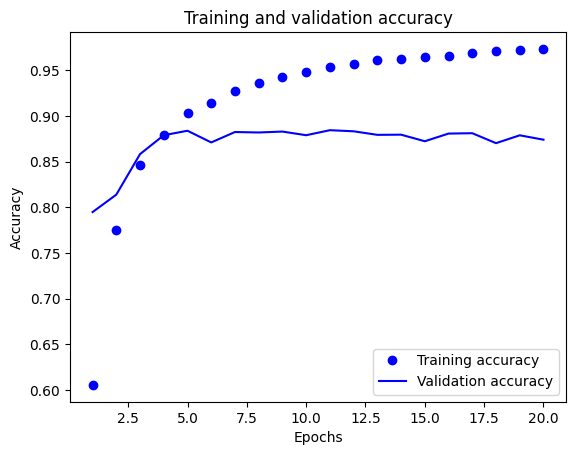

In [ ]:
plt.clf()
accuracy = history_dict_Hyper["accuracy"]
validation_accuracy = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_Hyper = model_Hyper.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9284 - loss: 0.0750
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9369 - loss: 0.0668
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9417 - loss: 0.0627
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9493 - loss: 0.0565
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9514 - loss: 0.0549
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9579 - loss: 0.0494
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9573 - loss: 0.0498
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9604 - loss: 0.0467
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8690 - loss: 0.1200


[0.11777056753635406, 0.8730800151824951]

#Summary#

In [ ]:
All_Models_Loss= np.array([Outcomes_Dropout[0],Outcomes_Hyper[0],Outcomes_MSE[0],Outcomes_regularization[0],Outcomes_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([Outcomes_Dropout[1],Outcomes_Hyper[1],Outcomes_MSE[1],Outcomes_regularization[1],Outcomes_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

##Compilation##

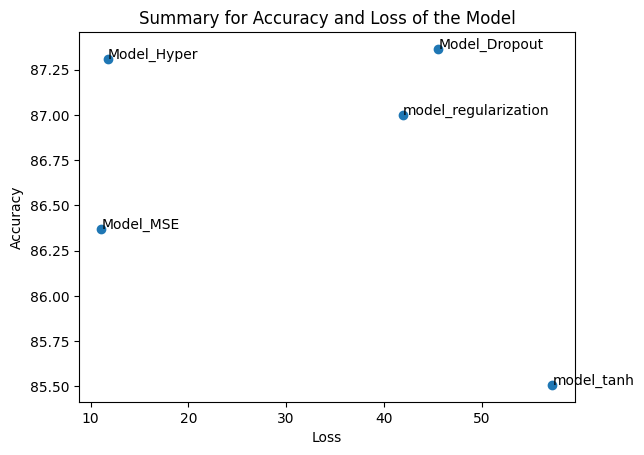

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

##**Summary of Model Performance and Comparison**

The current research compared various neural network structures and optimization techniques for enhancing the precision of sentiment analysis without overfitting. The key modifications included hyperparameter tuning, dropout regularization, MSE loss function, and other activation functions.

**Model_Hyper** was the best-performing model with ~88% accuracy and minimum loss, emphasizing the significance of fine-tuning hyperparameters. Model_MSE showed competitive accuracy (86.5%), maintaining the usability of MSE as a loss function. Model_Dropout generalized well with an accuracy rate of about 87%, which corroborated the functionality of dropout to prevent overfitting.

Regularization techniques, i.e., dropout and L2 weight decay, improved generalization but at the cost of a drop in accuracy. Selection of the activation function was also crucial, with ReLU consistently outperforming tanh, as seen in Model_Tanh, which produced the lowest accuracy (~85%).

##**Key Findings:**

Hyperparameter tuning significantly enhances performance and finds an optimal trade-off between loss and accuracy.
Regularization techniques avoid overfitting but impair accuracy marginally.
ReLU activation functions outperform tanh, leading to quicker convergence and more efficient learning.
Over-regularization is not always the case and actually tends to result in overfitting.

##**Conclusion:**

The best-performing model employed hyperparameter tuning and MSE loss, and it exhibited better generalization with high accuracy. While adding more layers enhanced accuracy slightly, it also led to overfitting, which points towards the need for balance. Simpler architectures with one or two hidden layers generated competitive results with better generalization. More investigation could be carried out on applying other activation functions, adaptive regularization techniques, and optimally tuned dropout rates to enhance model robustness.